#IMPORTING THE REQUIRED LIBRARIES

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

#LOADING THE DATASET

In [118]:
customer_data = pd.read_csv(r"Mall_Customers.csv")

In [119]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [120]:
customer_data.shape

(200, 5)

#CHECKING FOR NULL VALUES

In [121]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [122]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [123]:
x = customer_data.iloc[:,[3,4]].values

In [124]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

#FINDING THE K VALUE

In [125]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    

C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

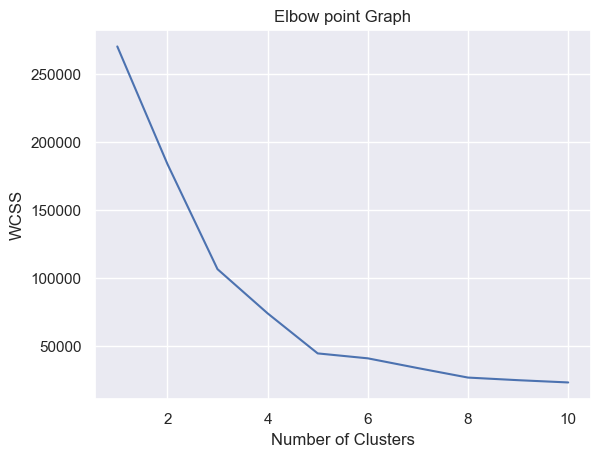

In [126]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#USING SILHOUETTE_SCORE TO FIND K VALUE

In [127]:
from sklearn.metrics import silhouette_score

C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

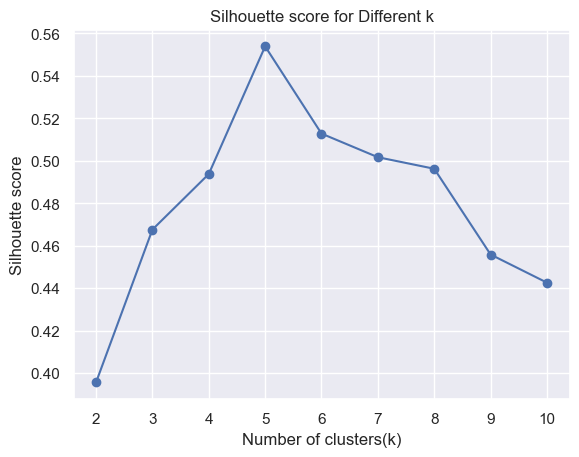

In [128]:
sil_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    z=kmeans.fit_predict(x)
    sil_scores.append(silhouette_score(x,z))
plt.plot(range(2,11),sil_scores,marker='o')
plt.title("Silhouette score for Different k")
plt.xlabel("Number of clusters(k)")
plt.ylabel("Silhouette score")
plt.show()

In [129]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=45)
y = kmeans.fit_predict(x)
print(y)

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


C:\Users\Sreejith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#PLOTTING THE CLUSTERS

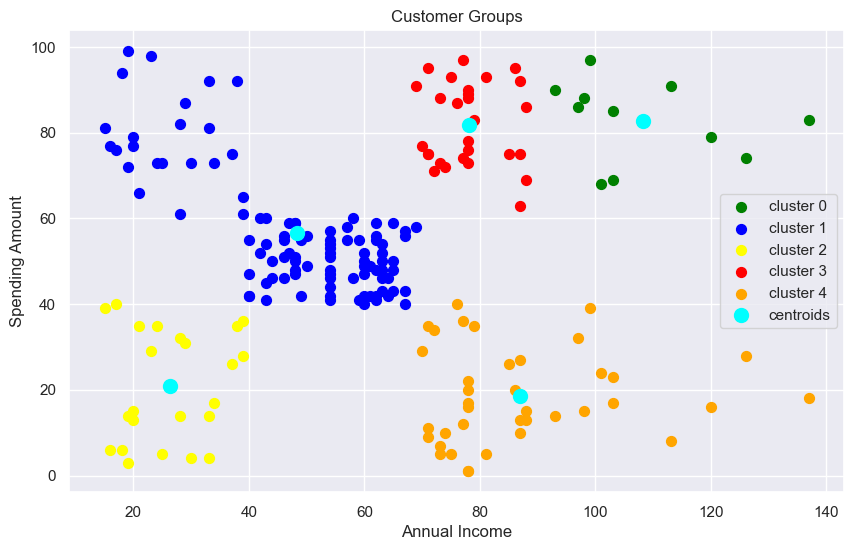

In [130]:
plt.figure(figsize=(10,6))
plt.scatter(x[y==0,0], x[y==0,1], s=50,c="green", label='cluster 0')
plt.scatter(x[y==1,0], x[y==1,1], s=50,c="blue", label='cluster 1')
plt.scatter(x[y==2,0], x[y==2,1], s=50,c="yellow", label='cluster 2')
plt.scatter(x[y==3,0], x[y==3,1], s=50,c="red", label='cluster 3')
plt.scatter(x[y==4,0], x[y==4,1], s=50,c="orange", label='cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Amount")
plt.legend()
plt.show()

#CLUSTER SUMMARY

In [131]:
customer_data['cluster'] = y

cluster_summary = customer_data.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                   
0            190.00  32.454545          108.181818               82.727273
1             70.97  39.200000           48.260000               56.480000
2             23.00  45.217391           26.304348               20.913043
3            151.00  32.785714           78.035714               81.892857
4            162.00  40.394737           87.000000               18.631579


#CLUSTER DISTRIBUTION

<function matplotlib.pyplot.show(close=None, block=None)>

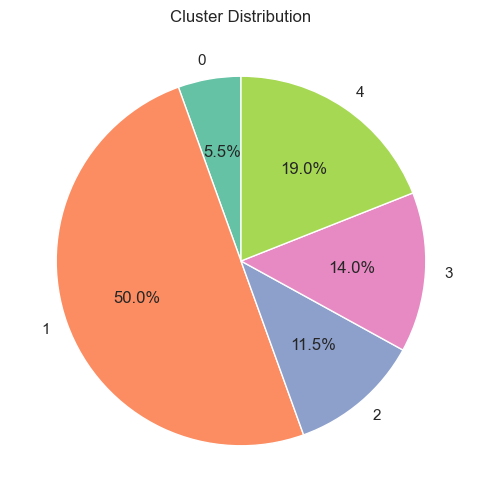

In [143]:
Cluster_counts = customer_data['cluster'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(Cluster_counts, labels=Cluster_counts.index,autopct='%1.1f%%',startangle=90,colors=plt.cm.Set2.colors)
plt.title("Cluster Distribution")
plt.show

#GENDER DISTRIBUTION PER CLUSTER

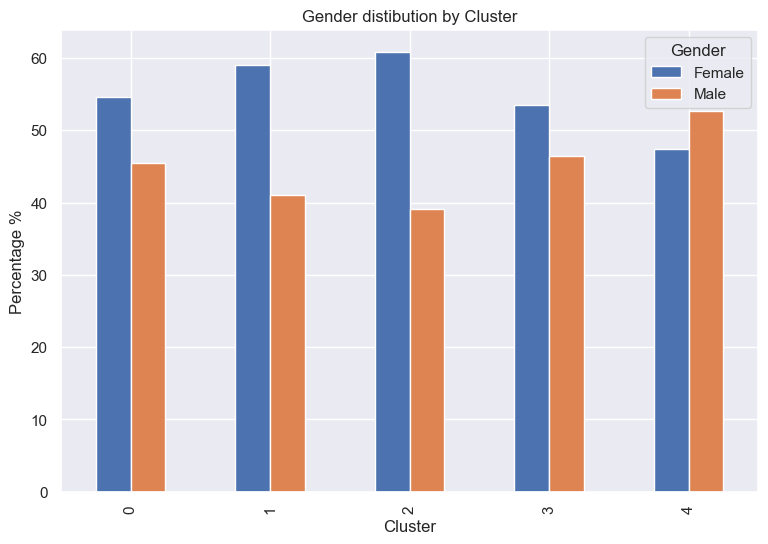

In [132]:
customer_data['Cluster']= y
for col in ['Gender']:
    cross_tab = pd.crosstab(customer_data['Cluster'],customer_data[col],normalize='index')*100
    cross_tab.plot(kind='bar',figsize=(9,6))
    plt.title(f"{col} distibution by Cluster")
    plt.ylabel("Percentage %")
    plt.show()

C:\Users\Sreejith\AppData\Local\Temp\ipykernel_12320\562993145.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster',y='Spending Score (1-100)',data=customer_data,estimator='mean',ci=None,palette='Set2')
C:\Users\Sreejith\AppData\Local\Temp\ipykernel_12320\562993145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster',y='Spending Score (1-100)',data=customer_data,estimator='mean',ci=None,palette='Set2')


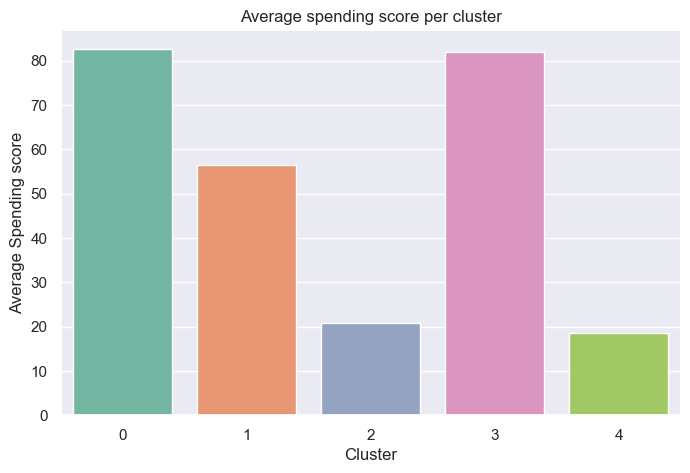

In [142]:
plt.figure(figsize=(8,5))
sns.barplot(x='Cluster',y='Spending Score (1-100)',data=customer_data,estimator='mean',ci=None,palette='Set2')
plt.title("Average spending score per cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spending score")
plt.show()